In [2]:
# 1️ Setup & Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Machine Learning imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# XGBoost optional, install only if needed
# from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [4]:
# Plot style (safe)
plt.style.use("ggplot")  # matplotlib built-in, safe across environments
# sns.set_palette("Set2")  # optional

In [81]:
# 2️ Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
# 3️ Data Understanding
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:

# Statistical summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Missing values
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# Convert 'TotalCharges' to numeric & fill missing values safely
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

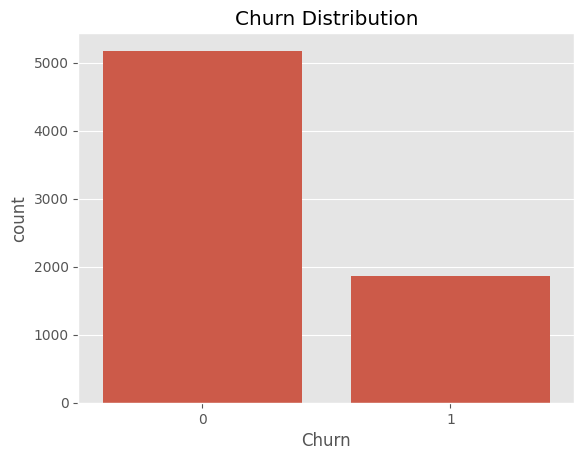

Churn Value Counts:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [30]:
# Target distribution
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

print("Churn Value Counts:\n", df["Churn"].value_counts(normalize=True))

In [11]:
# Drop 'customerID' only if it exists
if "customerID" in df.columns:column
    df = df.drop("customerID", axis=1)


In [12]:
# Encode categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [13]:
# Features & Target
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [25]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print("Before SMOTE:\n", y.value_counts())
print("After SMOTE:\n", y_res.value_counts())

Before SMOTE:
 Churn
0    5174
1    1869
Name: count, dtype: int64
After SMOTE:
 Churn
0    5174
1    5174
Name: count, dtype: int64


In [20]:
 # 4️. Data Preprocessing 

# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [21]:
# Convert categorical target into numeric (Yes=1, No=0)
y = y.map({"Yes": 1, "No": 0})

In [22]:
# Encode categorical columns
X = pd.get_dummies(X, drop_first=True)

In [26]:
# 1) Target column ko clean karna
print("Unique values in Churn column:", df["Churn"].unique())

Unique values in Churn column: [0 1]


In [31]:
# 1) Target column clean
df["Churn"] = df["Churn"].astype(str).str.strip()

In [32]:
# 2) Convert to numeric
if set(df["Churn"].unique()) <= {"0", "1"}:
    y = pd.to_numeric(df["Churn"], errors="coerce")
else:
    y = df["Churn"].map({"Yes": 1, "No": 0})


In [33]:
print("NaN in y:", y.isna().sum())
print("Unique values in y:", y.unique())

NaN in y: 0
Unique values in y: [0 1]


In [34]:
# 3) Features (X)
X = df.drop("Churn", axis=1)
X = pd.get_dummies(X, drop_first=True)

In [35]:
# 4) Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [36]:
print("Before SMOTE:\n", y.value_counts())
print("After SMOTE:\n", y_res.value_counts())

Before SMOTE:
 Churn
0    5174
1    1869
Name: count, dtype: int64
After SMOTE:
 Churn
0    5174
1    5174
Name: count, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

In [41]:
# Scaling (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (8278, 19) (8278,)
Test shape: (2070, 19) (2070,)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [46]:
# Predictions
y_pred = log_reg.predict(X_test)

In [47]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8048309178743961

Confusion Matrix:
 [[793 242]
 [162 873]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1035
           1       0.78      0.84      0.81      1035

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [54]:
# Initialize model without use_label_encoder
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

In [55]:

# Train the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
# Predictions
y_pred_xgb = xgb.predict(X_test)


In [57]:
# Accuracy
xgb_acc = accuracy_score(y_test, y_pred_xgb)


In [58]:

# AUC
xgb_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])

In [59]:

print("XGBoost Accuracy:", xgb_acc)
print("XGBoost AUC:", xgb_auc)

XGBoost Accuracy: 0.8429951690821256
XGBoost AUC: 0.9286027678592266


In [60]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


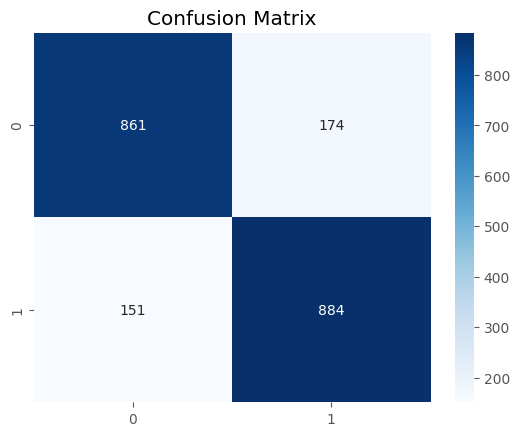

In [61]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [62]:
# Classification Report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.84      0.85      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



In [63]:
from xgboost import plot_importance

<Figure size 800x600 with 0 Axes>

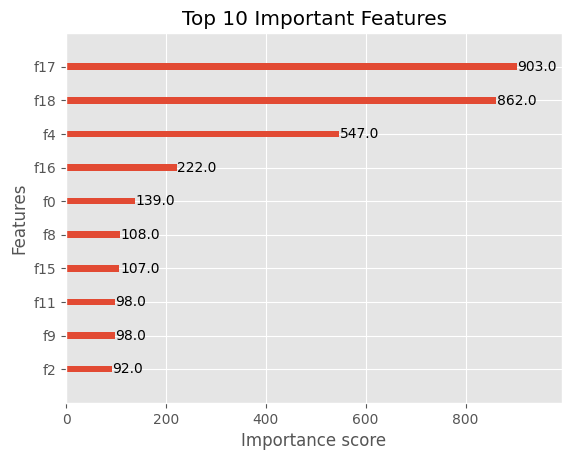

In [64]:
plt.figure(figsize=(8,6))
plot_importance(xgb, max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()

In [65]:
# Hyperparameter Tuning
# Basically it is use for model performace improve
from sklearn.model_selection import GridSearchCV

In [66]:
params = {
    'max_depth': [3,5,7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

In [67]:
grid = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=params,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)


In [68]:
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [69]:
# Save Model for Later Use
import joblib


In [70]:
# Save
joblib.dump(xgb, "xgb_churn_model.pkl")

['xgb_churn_model.pkl']

In [71]:
joblib.load("xgb_churn_model.pkl")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [73]:
# 1️ Load Saved XGBoost Model
import joblib

In [74]:
# Load the previously saved model
model = joblib.load("xgb_churn_model.pkl")
print("Model loaded successfully!")

Model loaded successfully!


In [75]:
# 2️ Make Predictions
# Predict classes
y_pred = model.predict(X_test)


In [76]:
# Predict probabilities (for AUC)
y_proba = model.predict_proba(X_test)[:,1]

In [77]:
# 3️ Evaluate Model
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [78]:

# Accuracy & AUC
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8430
AUC: 0.9286


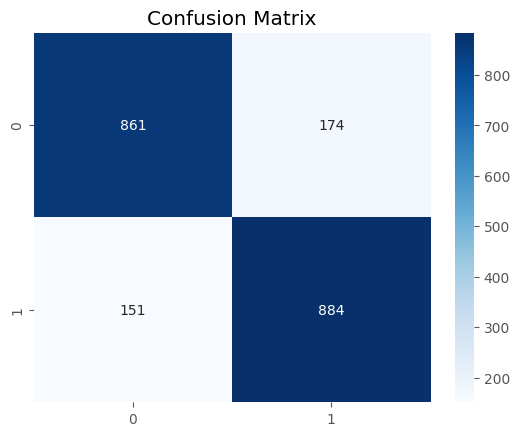

In [79]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [80]:

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.84      0.85      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



In [1]:
import os
os.getcwd()

'C:\\Users\\rkosa'